## 목표
- 두명의 얼굴이미지를 분류하는 이진 분류 모델 구현

### 데이터 불러오기
- PIL : 이미지 처리에 관련된 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

#### PIL.Image로 이미지를 불러오기
- convert("L") : 흑백
- convert("RGB") : 컬러

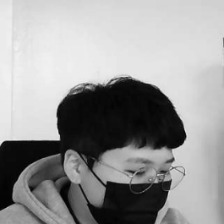

In [2]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL/data/Class 1-samples/0.jpg").convert("L")
img

- 이미지를 array 형태로 변환하기

In [3]:
img_array = np.array(img)
img_array

array([[224, 224, 224, ..., 208, 208, 208],
       [224, 224, 224, ..., 208, 208, 208],
       [225, 225, 225, ..., 208, 208, 208],
       ...,
       [151, 153, 154, ..., 152, 146, 142],
       [152, 153, 154, ..., 154, 148, 144],
       [155, 156, 157, ..., 155, 149, 145]], dtype=uint8)

- 해당 이미지는 224 * 224 크기이므로 배열 형태도 동일하게 나오는 걸 확인할 수 있다.

In [4]:
img_array.shape

(224, 224)

#### 이제 전체 이미지를 데이터셋으로 구성하기
- 데이터는 Class 1-samples, Class 2-samples 디렉토리 안에 0 ~ 200.jpg로 저장되어 있음
- 경로와 이름에 맞게 이미지를 가져와서 흑백 변환, array형태로 변환해서 리스트에 담기



In [5]:
# 두개의 클래스 200장씩 가져오기
class1_list, class2_list = [], []
path1 = "/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL/data/Class 1-samples/"
path2 = "/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL/data/Class 2-samples/"

for i in range(200):
    img1 = Image.open(path1 + str(i) + ".jpg").convert("L")
    img2 = Image.open(path2 + str(i) + ".jpg").convert("L")

    class1_list.append(np.array(img1))
    class2_list.append(np.array(img2))

- 각 클래스 이미지 200개가 들어있는 리스트도 numpy의 array 형태로 변환

In [6]:
class1_array = np.array(class1_list)
class2_array = np.array(class2_list)

class1_array.shape, class2_array.shape

((200, 224, 224), (200, 224, 224))

- 클래스1과 클래스2를 하나의 문제 데이터로 합치기
- concatenate : 두 배열을 순서대로 붙여주는 함수

In [7]:
data = np.concatenate((class1_array, class2_array))
data.shape

(400, 224, 224)

- 문제 데이터에 따른 정답 데이터 생성
- 클래스 1이 먼저 200개 존재하고 그 다음에 클래스 2가 200개 존재
    - 0 : 클래스 1
    - 1 : 클래스 2

In [8]:
target = np.array([0] * 200 + [1] * 200)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

- 학습 데이터, 평가 데이터로 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 224, 224), (80, 224, 224), (320,), (80,))

### 모델링

#### 1. 모델 설계

In [20]:
model = Sequential()

model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### 2. 모델 컴파일

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc']
              )

#### 3. 모델 학습

In [22]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=128)

Epoch 1/50
2/2 [==============================] - 1s 185ms/step - loss: 126.4271 - acc: 0.4727 - val_loss: 95.5070 - val_acc: 0.4844
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: 1249.4576 - acc: 0.5195 - val_loss: 1519.0959 - val_acc: 0.5156
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 927.6599 - acc: 0.6367 - val_loss: 943.8118 - val_acc: 0.4844
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 773.8789 - acc: 0.5273 - val_loss: 61.8204 - val_acc: 0.6250
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 192.0233 - acc: 0.5703 - val_loss: 15.3826 - val_acc: 0.8906
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 127.8617 - acc: 0.6992 - val_loss: 20.2178 - val_acc: 0.9062
Epoch 7/50
2/2 [==============================] - 0s 27ms/step - loss: 90.1627 - acc: 0.7227 - val_loss: 37.6586 - val_acc: 0.8594
Epoch 8/50
2/2 [==============================] - 0s 31ms/step - loss: 3

- 학습 현황 시각화

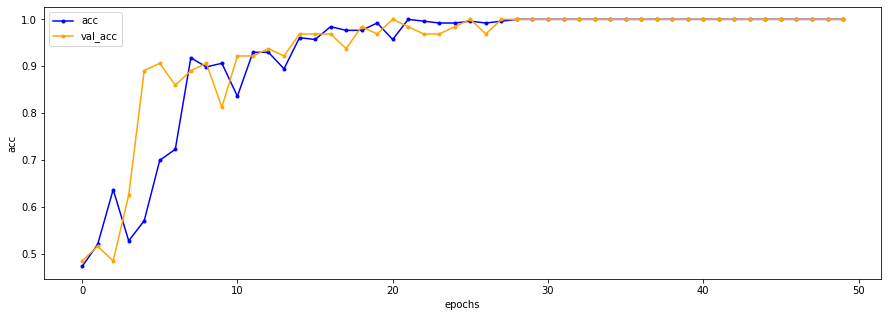

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['acc'], label='acc', c='blue', marker='.')
plt.plot(history.history['val_acc'], label='val_acc', c='orange', marker='.')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

#### 4. 모델 평가

In [14]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 1.9618e-32 - acc: 1.0000


[1.9617607754418254e-32, 1.0]

- relu와 Adam을 사용하여 100%의 결과가 나옴
- 2명의 사진이 모두 같은 웹캠에 같은 배경으로 찍었기 때문에 기계가 학습하기에 너무 편한 데이터셋이였다고 생각함